In [7]:
import yfinance as yf

# Fetch data for a specific stock
ticker = 'TATAMOTORS.NS'
data = yf.download(ticker, start="2019-01-01", end="2024-11-11")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                  
2019-01-01 00:00:00+00:00    172.379135    173.449997    174.199997   
2019-01-02 00:00:00+00:00    167.509384    168.550003    171.750000   
2019-01-03 00:00:00+00:00    165.024826    166.050003    170.149994   
2019-01-04 00:00:00+00:00    169.894577    170.949997    171.949997   
2019-01-07 00:00:00+00:00    174.267410    175.350006    178.199997   

Price                               Low          Open        Volume  
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS  
Date                                                                 
2019-01-01 00:00:00+00:00    171.300003    173.500000       6715543  
2019-01-02 00:00:00+00:00    168.000000    170.600006      13410104  
2019-01-03 00:00:00+00:00    165.100006    169.000000       9321842  
2019-01-04 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

In [8]:
# Save the data to a CSV file
data.to_csv(f'{ticker}_historical_data.csv')

In [17]:
data.shape

(1447, 6)

In [18]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1.447000e+03
mean,418.666752,420.459088,426.663477,414.808604,421.286973,3.332651e+07
std,278.275009,278.549265,281.518956,275.890052,279.352348,3.533115e+07
min,64.896851,65.300003,66.900002,63.500000,66.500000,2.871205e+06
25%,174.018951,175.099998,178.324997,172.399994,175.174995,1.179969e+07
50%,399.120575,401.600006,408.500000,395.000000,403.399994,2.020986e+07
75%,520.491577,523.725006,529.825012,519.000000,524.975006,4.287789e+07
max,1161.849976,1161.849976,1179.000000,1145.300049,1167.000000,3.905778e+08


In [12]:
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,TATAMOTORS.NS,0
Close,TATAMOTORS.NS,0
High,TATAMOTORS.NS,0
Low,TATAMOTORS.NS,0
Open,TATAMOTORS.NS,0
Volume,TATAMOTORS.NS,0


In [20]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2019-01-01 00:00:00+00:00,172.379135,173.449997,174.199997,171.300003,173.500000,6715543
2019-01-02 00:00:00+00:00,167.509384,168.550003,171.750000,168.000000,170.600006,13410104
2019-01-03 00:00:00+00:00,165.024826,166.050003,170.149994,165.100006,169.000000,9321842
2019-01-04 00:00:00+00:00,169.894577,170.949997,171.949997,168.500000,169.000000,17650435
2019-01-07 00:00:00+00:00,174.267410,175.350006,178.199997,173.199997,173.199997,21438351


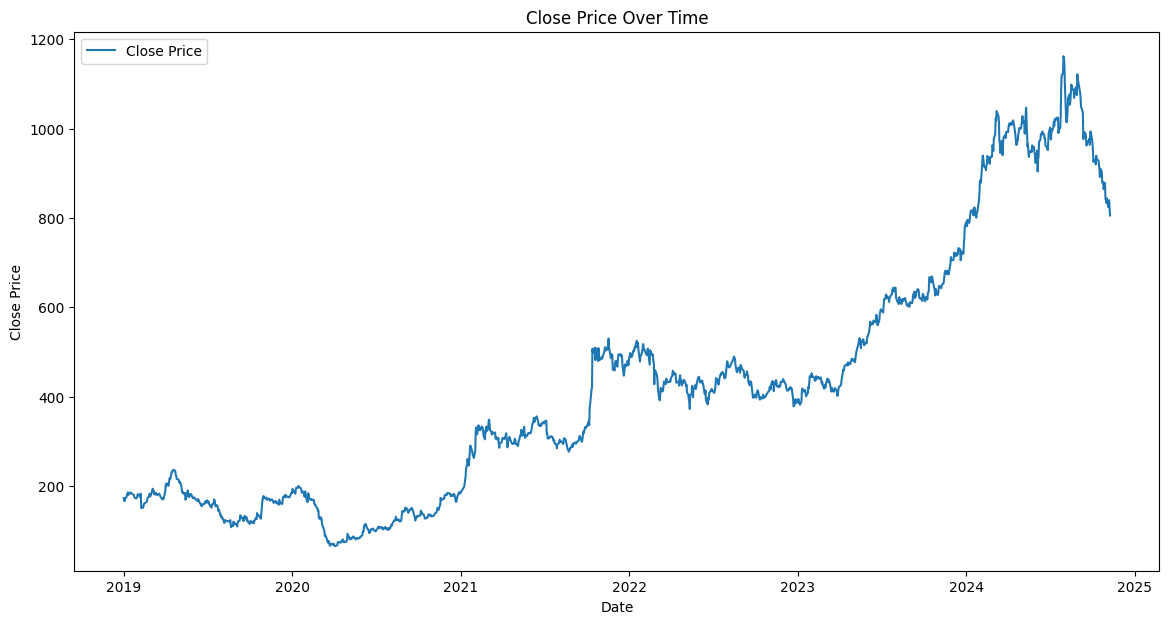

In [21]:
plt.figure(figsize = (14,7))
plt.plot(data['Close'], label = 'Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']])

In [33]:

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])


In [34]:
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

In [35]:

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [36]:
# Build
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [39]:
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0243 - val_loss: 0.0425
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 5.6550e-04 - val_loss: 0.0015
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.0747e-04 - val_loss: 0.0012
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 3.9468e-04 - val_loss: 0.0016
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 3.2453e-04 - val_loss: 0.0012
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 3.8212e-04 - val_loss: 0.0012
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 3.2690e-04 - val_loss: 0.0014
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 3.1758e-04 - val_loss: 0.0011
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 3.6339e-04 - val_loss: 0.0011
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 3.1857e-04 - val_loss: 0.0010
Epoch 12/50
18/18 ━━━━━━━

In [40]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step


In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices))
print(f"RMSE: {rmse}")

RMSE: 29.04507762536304


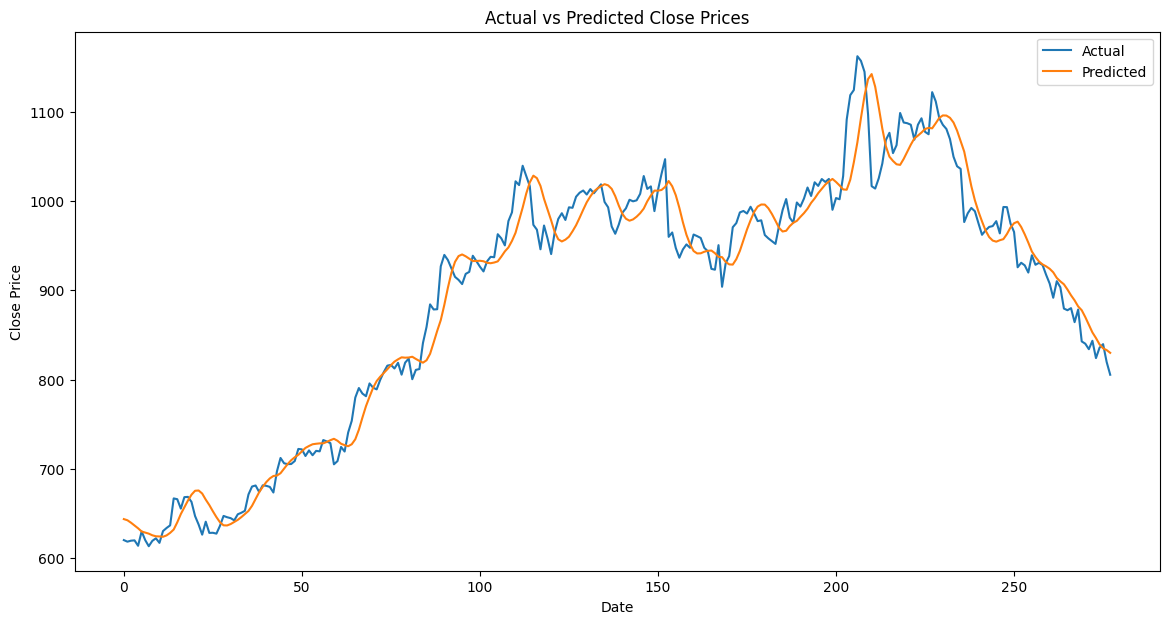

In [42]:
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#Bidirectional


In [43]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=25))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [48]:
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0282 - val_loss: 0.0449
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0028 - val_loss: 0.0066
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 6.9951e-04 - val_loss: 0.0023
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 5.5811e-04 - val_loss: 0.0018
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - loss: 4.2029e-04 - val_loss: 0.0015
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 4.0020e-04 - val_loss: 0.0015
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 3.1668e-04 - val_loss: 0.0011
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 3.5718e-04 - val_loss: 0.0010
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 2.4501e-04 - val_loss: 0.0012
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - loss: 2.5849e-04 - val_loss: 9.6346e-04
Epoch 12/50
18/

In [49]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices))
print(f"RMSE: {rmse}")

RMSE: 40.189673225840004


In [60]:
last_60_days = data['Close'].values[-60:]
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))


predicted_prices = []

current_input = last_60_days_scaled.reshape(1, -1, 1)



In [63]:
for _ in range(60):

    next_day_prediction = model.predict(current_input)


    predicted_prices.append(next_day_prediction[0, 0])

    next_day_prediction_reshaped = next_day_prediction.reshape(1, 1, 1)
    current_input = np.append(current_input[:, 1:, :], next_day_prediction_reshaped, axis=1)


predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

predicted_prices_60_days = predicted_prices.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

In [65]:
print("Predicted TML prices for the next 60 days:", predicted_prices_60_days)

Predicted TML prices for the next 60 days: [ 855.2326  855.2326  855.2326  864.5251  876.1295  889.658   904.6488
  920.8016  937.75    955.3032  973.3944  991.881  1010.4878 1029.2616
 1048.177  1067.1642 1086.1735 1105.1947 1124.2377 1143.2498 1162.1925
 1181.2703 1200.3134 1219.3043 1238.2483 1257.1736 1276.0922 1294.9506
 1313.7379 1332.448  1351.0647 1369.6469 1388.0281 1406.2319 1424.2744
 1442.1119 1459.8499 1477.3628 1494.6625 1511.7598 1528.5432 1545.0751
 1561.2958 1577.1891 1592.7653 1608.027  1623.007  1637.5724 1651.7712
 1665.6763 1679.2361 1692.432  1705.3179 1717.7861 1730.0073 1741.9215
 1753.5508 1764.8505 1775.9266 1786.6881 1797.1434 1807.4143]
